# 릿지회귀(Ridge)
* sklearn.linear_model.Ridge
* Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()

# Ridge
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, boston.data, boston.target, scoring="neg_mean_squared_error", cv=5)
rmse = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse)

print(f'5 fold의 개별 Negative MSE는 {np.round(neg_mse_scores, 3)}')
print(f'5 fold의 개별 RMSE는 {np.round(rmse, 3)}')
print(f'5 fold의 개별 RMSE의 평균은 {avg_rmse}')

5 fold의 개별 Negative MSE는 [-11.422 -24.294 -28.144 -74.599 -28.517]
5 fold의 개별 RMSE는 [3.38  4.929 5.305 8.637 5.34 ]
5 fold의 개별 RMSE의 평균은 5.518166280868971


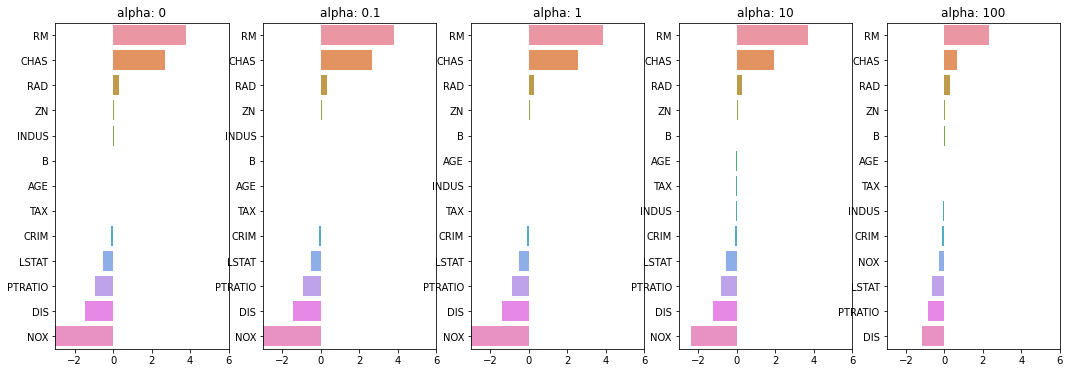

In [9]:
# 각각의 feature에 대한 상관계수를 그래프화

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge


fig , axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
alphas = [0, 0.1, 1, 10, 100]
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):    #인덱스 나오게 하기 위해
    # print(pos)
    ridge = Ridge(alpha=alpha)
    ridge.fit(boston.data, boston.target)

    coeff = pd.Series(data=ridge.coef_, index=boston.feature_names)
    column_name = f'alpha: {str(alpha)}'
    coeff_df[column_name] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(column_name)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

# 랏소 회귀(Lasso)
* sklearn.linear_model.Lasso
* Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

<ipython-input-10-5887f60aa7e7>:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  els.fit(boston.data, boston.target)
c:\Users\subin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\subin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5539.39228897748, tolerance: 4.2716295415019765
  model = cd_fast.enet_coordinate_descent(


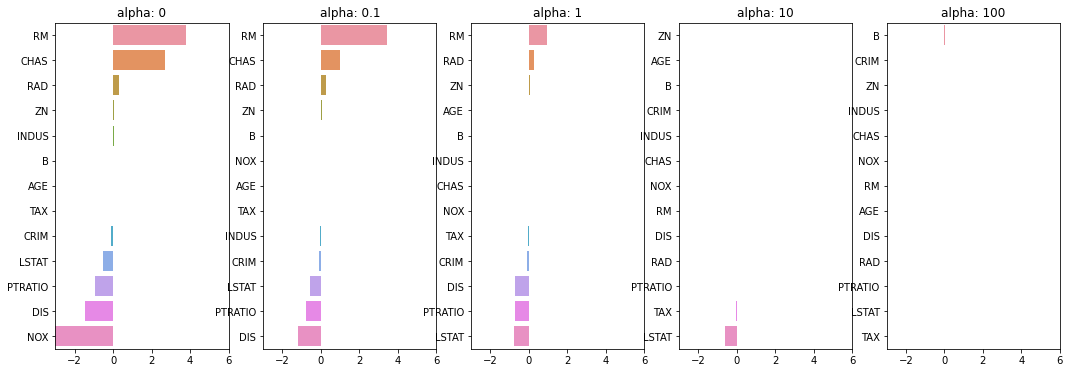

In [10]:
# 각각의 feature에 대한 상관계수를 그래프화

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet

fig , axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
alphas = [0, 0.1, 1, 10, 100]
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    # print(pos)
    els = ElasticNet(alpha=alpha, l1_ratio=0.7)
    els.fit(boston.data, boston.target)
    
    coeff = pd.Series(data=els.coef_, index=boston.feature_names)
    column_name = f'alpha: {str(alpha)}'
    coeff_df[column_name] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(column_name)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()